NLP example(ignore)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)



All the necessary imports

In [162]:
import os
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from num2words import num2words
from collections import Counter
import csv
import tf_idf
import matplotlib.pyplot as plt

In [ ]:
from nltk.book import *


In [97]:
#preprocessing functions
def remove_stopwords(data):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(str(data))
    
    filtered_data = ""
    
    for w in word_tokens:
        if w not in stop_words and len(w)>1:
            filtered_data=filtered_data+" "+w
    return filtered_data
    
def remove_punctuation(data):
    marks="~!@#$%^&*()_+=-`[]\;'./{}|:<>?""'\n"
    
    for i in marks:
        data=np.char.replace(data,i,' ')
        data=np.char.replace(data,"  "," ")
    
    data=np.char.replace(data,",",'')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    
    return new_text

def lemmatize(data):
    wnl=WordNetLemmatizer()
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + wnl.lemmatize(w)
    
    return new_text


def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def preprocess(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
    data = stemming(data)
    
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data



In [ ]:
# print(remove_punctuation("hey! how are you? i have 3 colors: red, white, and yellow."))

# print(lemmatize("hey! how are you lying i? have 3 studies colors: red, white, and yellow."))
# print(PorterStemmer().stem("study"))

# print(convert_numbers("hii 1002"))
# file = open('D:\\SDP/stories/SRE/sre01.txt', 'r', encoding="utf8", errors='ignore')
# text = file.read().strip()
# file.close()
#print(preprocess(text))

TF_IDF calculation for a bunch of documents present in the stories folder, idf is calculated by considering one story as a document
index.html contains list of all stories and their titles

In [10]:

#extracting all folders
folders=[x[0] for x in os.walk(str(os.getcwd())+'/stories/')]
folders=folders[1:]
#print(folders)

#extracting name and title of each story
dataset=[]
for f in folders:
    file=open(f+'/index.html','r')
    text=file.read().strip()
    file.close()
    
    names=re.findall('><A HREF="(.*)">',text)
    titles=re.findall('<BR><TD> (.*)\n', text)
    for j in range(len(names)):
        dataset.append((str(f)+'/'+names[j],titles[j]))
#print(dataset)

N=len(dataset)
#extracting data
processed_text = []
processed_title = []

for i in dataset[:N]:
    file = open(i[0], 'r', encoding="utf8", errors='ignore')
    text = file.read().strip()
    file.close()
    #preprocess and append whole file i.e. story
    processed_text.append(word_tokenize(str(preprocess(text))))
    
    #preprocess and append title i.e. in i[1]..dataset(filename,title)
    processed_title.append(word_tokenize(str(preprocess(i[1]))))


#calculate df for all words    
DF = {}

for i in range(N):
    tokens = processed_text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
    
    tokens = processed_title[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
for i in DF:
    DF[i] = len(DF[i])
# print("DF",DF)


doc = 0

tf_idf = {}

for i in range(N):
    
    tokens = processed_text[i]
    
    counter = Counter(tokens + processed_title[i])
    words_count = len(tokens + processed_title[i])
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = 0
        try:
            df=DF[token]
        except:
            pass
        idf = np.log((N+1)/(df+1))
        
        tf_idf[doc, token] = tf*idf

    doc += 1



0.0


In [11]:
print(tf_idf[0,"alway"])

0.00025662985945743163


Starting with our dataset, booksummaries.txt containing all the book titles and their summaries

In [130]:
import json
from tqdm import tqdm
import pandas as pd
dataset1=[]
dataset=[]
#dataset1: the whole dataset
#dataset: minimized version containing 3 books
#0:wikipediaId 1:fiebaseId 2:name 3:author 4:publish date 5:genres 6:summary


In [ ]:
with open('D:\\SDP/repo/book_summarization/booksummaries.txt', 'r', encoding="utf8", errors='ignore') as f:
    reader=csv.reader(f,dialect='excel-tab')
    for row in reader:
        dataset1.append([row[0],row[2],row[3],row[4],row[5],row[6]])
        



In [131]:
with open('D:\\SDP/repo/book_summarization/booksummaries1.txt', 'r', encoding="utf8", errors='ignore') as f:
    reader=csv.reader(f,dialect='excel-tab')
    for row in reader:
        dataset.append([row[0],row[2],row[3],row[4],row[5],row[6]])
        


In [103]:
# dataset=dataset1

In [170]:
df=pd.DataFrame(dataset,columns=['ID','Name','Author','Date','Genres','Summary'])


In [171]:
print(len(dataset))
print(len(df))
df

5
5


,ID,Name,Author,Date,Genres,Summary
0,620,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [172]:
df['Genres']

0    {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...
1    {"/m/06n90": "Science Fiction", "/m/0l67h": "N...
2    {"/m/02m4t": "Existentialism", "/m/02xlf": "Fi...
3                                                     
4    {"/m/03lrw": "Hard science fiction", "/m/06n90...
Name: Genres, dtype: object

In [173]:
df=df.drop(df[df['Genres']==''].index)
df

,ID,Name,Author,Date,Genres,Summary
0,620,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,2080,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [174]:
df['Genres']=df['Genres'].apply(lambda x: json.loads(x))

In [175]:
genres={}

print(len(df['Genres']))
for i in df['Genres']:
    for i1,j1 in i.items():
        try:
            genres[i1]=j1
        except:
            pass

genres

4


{'/m/016lj8': 'Roman à clef',
 '/m/06nbt': 'Satire',
 '/m/0dwly': "Children's literature",
 '/m/014dfn': 'Speculative fiction',
 '/m/02xlf': 'Fiction',
 '/m/06n90': 'Science Fiction',
 '/m/0l67h': 'Novella',
 '/m/0c082': 'Utopian and dystopian fiction',
 '/m/02m4t': 'Existentialism',
 '/m/0pym5': 'Absurdist fiction',
 '/m/05hgj': 'Novel',
 '/m/03lrw': 'Hard science fiction',
 '/m/01hmnh': 'Fantasy'}

In [176]:
len(genres)

13

In [177]:
summaryfeatures=[]
summaryfeatures=df['Summary'].apply(lambda x: tf_idf.generate_features(x))


In [178]:
len(summaryfeatures)

4

In [141]:
genrefeatures={}
for x in summaryfeatures.keys():
    for i,j in df.loc[x]['Genres'].items():
        try:
            genrefeatures[i]=genrefeatures[i]+summaryfeatures[x]
        except:
            genrefeatures[i]=summaryfeatures[x]
genrefeatures

{'/m/016lj8': ['uniting',
  'workhorse',
  'special',
  'thin',
  'working',
  'worlds',
  'tell',
  'upright',
  'violent',
  'work'],
 '/m/06nbt': ['uniting',
  'workhorse',
  'special',
  'thin',
  'working',
  'worlds',
  'tell',
  'upright',
  'violent',
  'work',
  'window',
  'young',
  'walloping',
  'unintended',
  'working',
  'wife',
  'tragic',
  'unconscious',
  'violent',
  'violence'],
 '/m/0dwly': ['uniting',
  'workhorse',
  'special',
  'thin',
  'working',
  'worlds',
  'tell',
  'upright',
  'violent',
  'work'],
 '/m/014dfn': ['uniting',
  'workhorse',
  'special',
  'thin',
  'working',
  'worlds',
  'tell',
  'upright',
  'violent',
  'work',
  'window',
  'young',
  'walloping',
  'unintended',
  'working',
  'wife',
  'tragic',
  'unconscious',
  'violent',
  'violence',
  'unthinking',
  'two',
  'years',
  'war',
  'technology',
  'universe',
  'young',
  'world',
  'wrecking',
  'unharmed'],
 '/m/02xlf': ['uniting',
  'workhorse',
  'special',
  'thin',
  'w

To access features of any genre, use the genre ID from 'genres' as the key in genrefeatures

In [179]:
genrefeatures['/m/02xlf']

['uniting',
 'workhorse',
 'special',
 'thin',
 'working',
 'worlds',
 'tell',
 'upright',
 'violent',
 'work',
 'window',
 'young',
 'walloping',
 'unintended',
 'working',
 'wife',
 'tragic',
 'unconscious',
 'violent',
 'violence',
 'violence',
 'test',
 'well',
 'view',
 'ward',
 'unexpected',
 'use',
 'would',
 'waste',
 'unaware',
 'unthinking',
 'two',
 'years',
 'war',
 'technology',
 'universe',
 'young',
 'world',
 'wrecking',
 'unharmed']

In [143]:
summary='The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the "Unthinking Depths", surrounds the galactic core and is incapable of supporting advanced life forms at all. The next layer, the "Slow Zone", is roughly equivalent to the real world in behavior and potential. Further out, the zone named the "Beyond" can support futuristic technologies such as AI and FTL travel. The outermost zone, the "Transcend", contains most of the galactic halo and is populated by incomprehensibly vast and powerful posthuman entities. A human expedition investigates a five-billion-year-old data archive that offers the possibility of unimaginable riches for the ambitious young civilization of the Straumli Realm. The expedition\'s facility, called High Lab, is gradually compromised by a dormant super-intelligent entity (actually encoded within the archive) later known as the Blight. The Blight rapidly learns how to infiltrate and control the computer systems of High Lab, and even develops the ability to possess and control the living humans. The novel starts with an imaginative description of the evolution of this superintelligence through exponentially accelerating developmental stages, culminating in a transcendent, nigh-omnipotent power that is unfathomable to mere humans. Shortly before its final "flowering", the changes in a single minute of the Blight\'s life are said to exceed those of 10,000 years of human civilization. Recognizing the danger of what they have awakened, the researchers at High Lab attempt to flee in two ships. Suspicious, the Blight discovers that one of the ships contains a data storage device in its cargo manifest; assuming it contains information that could harm it, the Blight destroys the ship. The second ship is allowed to escape, unharmed, as the Blight assumes that it is no threat; but later realizes that it actually held a countermeasure, one of the few things in the universe that the Blight fears. The ship lands on a distant planet with a medieval-level civilization of dog-like creatures dubbed "Tines", who live in packs as group minds. The ship is revealed to be a sleeper ship, carrying most of High Lab\'s children in "coldsleep boxes". The boxes are rapidly failing and the surviving adults begin unloading them, but are killed when one of two rival forces of Tines seize the ship. The faction that initially contacts the humans, led by a Tine known as Steel, kills the adults and destroys many of the coldsleep boxes. They also capture a boy named Jefri Olsndot, whom Steel intended on killing but eventually exploits in order to develop advanced technology (such as cannon and radio communication). Jefri\'s older sister, Johanna, is rescued by Pilgrim and Scriber, wandering Tines who bring her to the rival faction, led by Woodcarver. She is asked to help develop technology that could gain the upper hand in the impending war. A distress signal from the sleeper ship eventually reaches "Relay", a major node in the galactic communications network. A benign transcendent entity (known as a "Power") named "Old One" contacts Relay, seeking information about the Blight and the humans who released it. Old One constructs a seemingly human man, Pham Nuwen, to act as its agent. Pham and Ravna Bergsndot – a human employee of Relay\'s owners, the wealthy Vrinimi Organization – trace the sleeper ship\'s signal to the Tines world. Old One designs a vessel, the Out of Band II, to reach the Tines world and to investigate what the ship carried with it from the High Lab. The Blight attacks Relay and Old One. Old One gives Pham the information necessary to activate the Blight Countermeasure while dying (a process known as godshatter), and Pham and Ravna escape Relay\'s destruction in the Out of Band II. After arriving at the Tines homeworld and allying with Woodcarver to defeat Steel, Pham initiates the Countermeasure, which extends the Slow Zone by thousands of light-years to enclose the Blight. This ends the threat of the Blight at the cost of wrecking thousands of uninvolved civilizations, causing trillions of deaths and potentially the extinction of several galactic races. The process also kills Pham and strands the other humans on the Tines world, now in the depths of the "Slow Zone" where rescue by an advanced civilization is impossible.'

summary

'The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the "Unthinking Depths", surrounds the galactic core and is incapable of supporting advanced life forms at all. The next layer, the "Slow Zone", is roughly equivalent to the real world in behavior and potential. Further out, the zone named the "Beyond" can support futuristic technologies such as AI and FTL travel. The outermost zone, the "Transcend", contains most of the galactic halo and is populated by incomprehensibly vast and powerful posthuman entities. A human expedition investigates a five-billion-year-old data archive that offers the possibility of unimaginable riches for the ambitious young civilization of the Straumli Realm. The expedition\'s facility, called High Lab, is gradually compromised by a dormant super-intelligent entity

In [98]:
preprocess(summary)

' novel posit space around milki way divid concentr layer call zone constrain differ law physic allow differ degr biolog technolog advanc innermost unthink depth surround galact core incap support advanc life form next layer slow zone roughli equiv real world behavior potenti zone name beyond support futurist technolog ai ftl travel outermost zone transcend contain galact halo popul incomprehen vast power posthuman entiti human expedit investig five billion year old data archiv offer possibl unimagin rich ambiti young civil straumli realm expedit facil call high lab gradual compromi dormant super intellig entiti actual encod within archiv later known blight blight rapidli learn infiltr control comput system high lab even develop abil possess control live human novel start imagin descript evolut superintellig exponenti accel develop stage culmin transcend nigh omnipot power unfathom mere human shortli final flower chang singl minut blight life said exceed ten thousand year human civil r

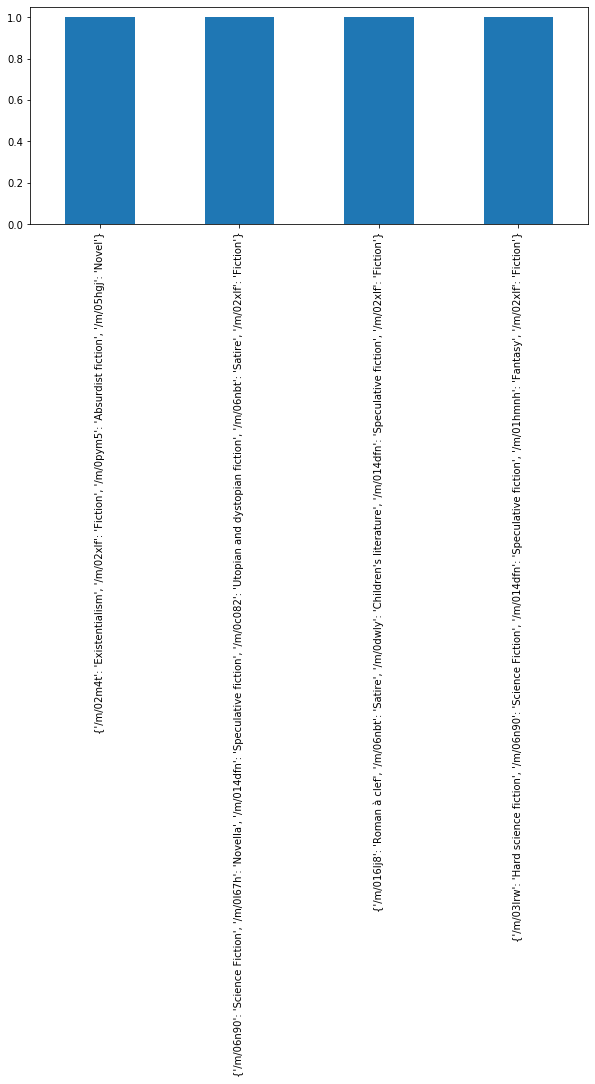

In [165]:
tags=genres.keys()


X=df.Summary
Y=df.Genres.apply(lambda x: x.keys())

In [159]:
X

0     Old Major, the old boar on the Manor Farm, ca...
1     Alex, a teenager living in near-future Englan...
2     The text of The Plague is divided into five p...
4     The novel posits that space around the Milky ...
Name: Summary, dtype: object

In [160]:
Y

0    (/m/016lj8, /m/06nbt, /m/0dwly, /m/014dfn, /m/...
1    (/m/06n90, /m/0l67h, /m/014dfn, /m/0c082, /m/0...
2             (/m/02m4t, /m/02xlf, /m/0pym5, /m/05hgj)
4    (/m/03lrw, /m/06n90, /m/014dfn, /m/01hmnh, /m/...
Name: Genres, dtype: object